## Prérequis

In [ ]:
!pip install lazypredict
!pip install shap

In [91]:
import shap

In [92]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
import glob
import sklearn
import sklearn.tree
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeClassifierCV

import joblib


## Importation des données





In [93]:
original_data=pd.read_csv('./nba_logreg.csv')

In [94]:
original_data

Name  GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  ...  \
0      Brandon Ingram  36 27.40 7.40 2.60 7.60 34.70     0.50 2.10 25.00  ...   
1     Andrew Harrison  35 26.90 7.20 2.00 6.70 29.60     0.70 2.80 23.50  ...   
2      JaKarr Sampson  74 15.30 5.20 2.00 4.70 42.20     0.40 1.70 24.40  ...   
3         Malik Sealy  58 11.60 5.70 2.30 5.50 42.60     0.10 0.50 22.60  ...   
4         Matt Geiger  48 11.50 4.50 1.60 3.00 52.40     0.00 0.10  0.00  ...   
...               ...  ..   ...  ...  ...  ...   ...      ...  ...   ...  ...   
1335      Chris Smith  80 15.80 4.30 1.60 3.60 43.30     0.00 0.20 14.30  ...   
1336      Brent Price  68 12.60 3.90 1.50 4.10 35.80     0.10 0.70 16.70  ...   
1337     Marlon Maxey  43 12.10 5.40 2.20 3.90 55.00     0.00 0.00  0.00  ...   
1338  Litterial Green  52 12.00 4.50 1.70 3.80 43.90     0.00 0.20 10.00  ...   
1339        Jon Barry  47 11.70 4.40 1.60 4.40 36.90     0.40 1.30 33.30  ...   

      FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
0    2.30 69.90  0.70  3.40 4.10 1.90 0.40 0.40 1.30         0.00  
1    3.40 76.50  0.50  2.00 2.40 3.70 1.10 0.50 1.60         0.00  
2    1.30 67.00  0.50  1.70 2.20 1.00 0.50 0.30 1.00         0.00  
3    1.30 68.90  1.00  0.90 1.90 0.80 0.60 0.10 1.00         1.00  
4    1.90 67.40  1.00  1.50 2.50 0.30 0.30 0.40 0.80         1.00  
...   ...   ...   ...   ...  ...  ...  ...  ...  ...          ...  
1335 1.50 79.20  0.40  0.80 1.20 2.50 0.60 0.20 0.80         0.00  
1336 1.00 79.40  0.40  1.10 1.50 2.30 0.80 0.00 1.30         1.00  
1337 1.60 64.30  1.50  2.30 3.80 0.30 0.30 0.40 0.90         0.00  
1338 1.80 62.50  0.20  0.40 0.70 2.20 0.40 0.10 0.80         1.00  
1339 1.00 67.30  0.20  0.70 0.90 1.40 0.70 0.10 0.90         1.00  

[1340 rows x 21 columns]

## Statistiques descriptives

In [95]:
original_data.describe()

GP     MIN     PTS     FGM     FGA     FG%  3P Made     3PA  \
count 1340.00 1340.00 1340.00 1340.00 1340.00 1340.00  1340.00 1340.00   
mean    60.41   17.62    6.80    2.63    5.89   44.17     0.25    0.78   
std     17.43    8.31    4.36    1.68    3.59    6.14     0.38    1.06   
min     11.00    3.10    0.70    0.30    0.80   23.80     0.00    0.00   
25%     47.00   10.88    3.70    1.40    3.30   40.20     0.00    0.00   
50%     63.00   16.10    5.55    2.10    4.80   44.10     0.10    0.30   
75%     77.00   22.90    8.80    3.40    7.50   47.90     0.40    1.20   
max     82.00   40.90   28.20   10.20   19.80   73.70     2.30    6.50   

          3P%     FTM     FTA     FT%    OREB    DREB     REB     AST     STL  \
count 1329.00 1340.00 1340.00 1340.00 1340.00 1340.00 1340.00 1340.00 1340.00   
mean    19.31    1.30    1.82   70.30    1.01    2.03    3.03    1.55    0.62   
std     16.02    0.99    1.32   10.58    0.78    1.36    2.06    1.47    0.41   
min      0.00    0.00    0.00    0.00    0.00    0.20    0.30    0.00    0.00   
25%      0.00    0.60    0.90   64.70    0.40    1.00    1.50    0.60    0.30   
50%     22.40    1.00    1.50   71.25    0.80    1.70    2.50    1.10    0.50   
75%     32.50    1.60    2.30   77.60    1.40    2.60    4.00    2.00    0.80   
max    100.00    7.70   10.20  100.00    5.30    9.60   13.90   10.60    2.50   

          BLK     TOV  TARGET_5Yrs  
count 1340.00 1340.00      1340.00  
mean     0.37    1.19         0.62  
std      0.43    0.72         0.49  
min      0.00    0.10         0.00  
25%      0.10    0.70         0.00  
50%      0.20    1.00         1.00  
75%      0.50    1.50         1.00  
max      3.90    4.40         1.00

Cette description statistique aide à comprendre que la variable MIN représente le nombre des minutes jouées par match comme exemple.

In [96]:
paramset = original_data.drop(['TARGET_5Yrs','Name'],axis=1).columns.values
df_vals = original_data.drop(['TARGET_5Yrs','Name'],axis=1).values

In [97]:
valeurs_uniques = original_data['Name'].unique()
len(valeurs_uniques)

1294

## Vérification de type de données

In [98]:
original_data.dtypes

Name            object
GP               int64
MIN            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3P Made        float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
TARGET_5Yrs    float64
dtype: object

In [99]:
type_predifini =float
resultats_verification = original_data.applymap(lambda x:  isinstance(x, type_predifini))

# Somme des valeurs False pour chaque colonne
sommes_des_faux_par_colonne = resultats_verification.apply(lambda col: col.value_counts().get(False, 0))

# Affichage du résultat
print("Sommes des éléments ne suivant pas le type prédéfini par colonne:")
print(sommes_des_faux_par_colonne)


Sommes des éléments ne suivant pas le type prédéfini par colonne:
Name           1340
GP             1340
MIN               0
PTS               0
FGM               0
FGA               0
FG%               0
3P Made           0
3PA               0
3P%               0
FTM               0
FTA               0
FT%               0
OREB              0
DREB              0
REB               0
AST               0
STL               0
BLK               0
TOV               0
TARGET_5Yrs       0
dtype: int64


In [100]:
type_predifini =int
resultats_verification = original_data.applymap(lambda x:  isinstance(x, type_predifini))

sommes_des_faux_par_colonne = resultats_verification.apply(lambda col: col.value_counts().get(False, 0))


print("Sommes des éléments ne suivant pas le type prédéfini par colonne:")
print(sommes_des_faux_par_colonne)


Sommes des éléments ne suivant pas le type prédéfini par colonne:
Name           1340
GP                0
MIN            1340
PTS            1340
FGM            1340
FGA            1340
FG%            1340
3P Made        1340
3PA            1340
3P%            1340
FTM            1340
FTA            1340
FT%            1340
OREB           1340
DREB           1340
REB            1340
AST            1340
STL            1340
BLK            1340
TOV            1340
TARGET_5Yrs    1340
dtype: int64


In [101]:
liste_columns = [column for column in original_data.columns if column != 'GP' and column!="Name"]
#print(liste_columns)

original_data[liste_columns] = original_data[liste_columns].astype(float)

## Vérification des éléments dupliqués

In [102]:

duplicates = original_data[original_data.duplicated('Name')]

if not duplicates.empty:
    print("Duplicates are :")
    print(duplicates)
else:
    print("there are no duplicates ")


Duplicates are :
                  Name  GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA   3P%  \
19       Larry Johnson  82 37.20 19.20 7.50 15.30 49.00     0.10 0.30 22.70   
72           Dee Brown  82 23.70  8.70 3.50  7.50 46.40     0.10 0.40 20.60   
73           Dee Brown  49  9.20  1.90 0.70  2.00 32.70     0.10 0.60 21.40   
74           Dee Brown  49  9.20  1.90 0.70  2.00 32.70     0.10 0.60 21.40   
121       Tim Hardaway  79 33.70 14.70 5.90 12.50 47.10     0.30 1.10 27.40   
127          Glen Rice  77 30.00 13.60 6.10 13.90 43.90     0.20 0.90 24.60   
157      Michael Smith  65  9.50  5.00 2.10  4.40 47.60     0.00 0.40  7.10   
158      Michael Smith  82 21.20  6.90 2.70  5.00 54.20     0.00 0.00  0.00   
159      Michael Smith  82 21.20  6.90 2.70  5.00 54.20     0.00 0.00  0.00   
163      Charles Smith  60  8.70  2.90 1.00  2.20 44.40     0.00 0.10  0.00   
164      Charles Smith  60  8.70  2.90 1.00  2.20 44.40     0.00 0.10  0.00   
165      Charles Smith  71 30.40 16

In [103]:
duplicates

Name  GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA   3P%  \
19       Larry Johnson  82 37.20 19.20 7.50 15.30 49.00     0.10 0.30 22.70   
72           Dee Brown  82 23.70  8.70 3.50  7.50 46.40     0.10 0.40 20.60   
73           Dee Brown  49  9.20  1.90 0.70  2.00 32.70     0.10 0.60 21.40   
74           Dee Brown  49  9.20  1.90 0.70  2.00 32.70     0.10 0.60 21.40   
121       Tim Hardaway  79 33.70 14.70 5.90 12.50 47.10     0.30 1.10 27.40   
127          Glen Rice  77 30.00 13.60 6.10 13.90 43.90     0.20 0.90 24.60   
157      Michael Smith  65  9.50  5.00 2.10  4.40 47.60     0.00 0.40  7.10   
158      Michael Smith  82 21.20  6.90 2.70  5.00 54.20     0.00 0.00  0.00   
159      Michael Smith  82 21.20  6.90 2.70  5.00 54.20     0.00 0.00  0.00   
163      Charles Smith  60  8.70  2.90 1.00  2.20 44.40     0.00 0.10  0.00   
164      Charles Smith  60  8.70  2.90 1.00  2.20 44.40     0.00 0.10  0.00   
165      Charles Smith  71 30.40 16.30 6.10 12.40 49.50     0.00 0.00  0.00   
166      Charles Smith  71 30.40 16.30 6.10 12.40 49.50     0.00 0.00  0.00   
167      Charles Smith  71 30.40 16.30 6.10 12.40 49.50     0.00 0.00  0.00   
168      Charles Smith  34  8.60  3.50 1.40  3.70 39.20     0.40 1.40 31.90   
169      Charles Smith  34  8.60  3.50 1.40  3.70 39.20     0.40 1.40 31.90   
170      Charles Smith  34  8.60  3.50 1.40  3.70 39.20     0.40 1.40 31.90   
198   Michael Anderson  65 18.50  7.40 2.90  5.80 50.10     0.00 0.10  0.00   
209        Mark Bryant  36  7.00  1.60 0.70  1.60 43.10     0.00 0.00  0.00   
224         Mark Davis  33  7.80  3.80 1.50  3.10 48.00     0.00 0.30 10.00   
225         Mark Davis  57 10.00  3.30 1.00  2.60 36.90     0.10 0.20 30.80   
226         Mark Davis  57 10.00  3.30 1.00  2.60 36.90     0.10 0.20 30.80   
243    Reggie Williams  35 24.50 10.40 4.30 12.20 35.60     0.40 1.70 22.40   
312         Bob Martin  53 10.10  2.10 0.80  1.70 45.50     0.00 0.00  0.00   
339        Ken Johnson  64 12.70  4.10 1.80  3.30 52.80     0.00 0.00   NaN   
365      Charles Jones  78 20.10  8.40 3.00  5.80 52.00     0.00 0.10  0.00   
366      Charles Jones  78 20.10  8.40 3.00  5.80 52.00     0.00 0.10  0.00   
367      Charles Jones  29 16.40  3.70 1.30  4.20 31.70     0.70 2.10 31.10   
368      Charles Jones  29 16.40  3.70 1.30  4.20 31.70     0.70 2.10 31.10   
369      Charles Jones  29 16.40  3.70 1.30  4.20 31.70     0.70 2.10 31.10   
461        Jeff Taylor  77 19.60  6.10 2.20  5.20 43.10     0.70 2.00 34.40   
473     Walker Russell  68 11.10  2.70 1.00  2.70 36.40     0.00 0.30 11.10   
504      Eddie Johnson  74 20.50  9.30 4.00  8.70 45.90     0.00 0.10  9.10   
554         Larry Drew  76 20.80  6.60 2.60  6.40 40.70     0.10 0.20 23.50   
566      James Johnson  65 11.60  3.90 1.50  3.20 45.20     0.20 0.70 32.60   
733   Gerald Henderson  43  8.30  2.60 0.90  2.40 35.60     0.10 0.40 21.10   
768     Cory Alexander  60  9.30  2.80 1.10  2.60 40.60     0.40 1.10 39.40   
824    Marcus Williams  79 16.60  6.80 2.60  6.70 39.50     0.60 2.10 28.20   
849        Bobby Jones  44  7.60  2.50 1.00  2.10 46.20     0.00 0.20 11.10   
871          David Lee  67 16.90  5.10 2.00  3.40 59.60     0.00 0.00  0.00   
960      Carlos Rogers  49 20.80  8.90 3.70  6.90 52.90     0.00 0.30 14.30   
971      Mike Dunleavy  82 15.90  5.70 2.00  5.10 40.30     0.60 1.80 34.70   
1094       Jamie Feick  41 15.20  3.70 1.40  3.80 35.70     0.10 0.30 35.70   
1127  Cedric Henderson  82 30.80 10.10 4.20  8.80 48.00     0.00 0.00  0.00   
1230    Glenn Robinson  80 37.00 21.90 8.00 17.60 45.10     1.10 3.40 32.10   
1335       Chris Smith  80 15.80  4.30 1.60  3.60 43.30     0.00 0.20 14.30   

      ...  FTA   FT%  OREB  DREB   REB  AST  STL  BLK  TOV  TARGET_5Yrs  
19    ... 5.00 82.90  3.90  7.00 11.00 3.60 1.00 0.60 1.90         1.00  
72    ... 1.90 87.30  0.50  1.70  2.20 4.20 1.00 0.20 1.70         1.00  
73    ... 0.80 64.90  0.20  0.70  0.80 1.70 0.50 0.10 0.60         0.00  
74    ..

Ce qu'on peut observer c'est que, pour certains joueurs, il existe deux échantillons différents voire répétés, on a décidé de prendre en considération la première occurrence de ce joueur.

In [104]:
original_data.drop_duplicates(subset='Name', keep='first', inplace=True)
original_data

Name  GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  ...  \
0      Brandon Ingram  36 27.40 7.40 2.60 7.60 34.70     0.50 2.10 25.00  ...   
1     Andrew Harrison  35 26.90 7.20 2.00 6.70 29.60     0.70 2.80 23.50  ...   
2      JaKarr Sampson  74 15.30 5.20 2.00 4.70 42.20     0.40 1.70 24.40  ...   
3         Malik Sealy  58 11.60 5.70 2.30 5.50 42.60     0.10 0.50 22.60  ...   
4         Matt Geiger  48 11.50 4.50 1.60 3.00 52.40     0.00 0.10  0.00  ...   
...               ...  ..   ...  ...  ...  ...   ...      ...  ...   ...  ...   
1334      Chris Smith  80 15.80 4.30 1.60 3.60 43.30     0.00 0.20 14.30  ...   
1336      Brent Price  68 12.60 3.90 1.50 4.10 35.80     0.10 0.70 16.70  ...   
1337     Marlon Maxey  43 12.10 5.40 2.20 3.90 55.00     0.00 0.00  0.00  ...   
1338  Litterial Green  52 12.00 4.50 1.70 3.80 43.90     0.00 0.20 10.00  ...   
1339        Jon Barry  47 11.70 4.40 1.60 4.40 36.90     0.40 1.30 33.30  ...   

      FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
0    2.30 69.90  0.70  3.40 4.10 1.90 0.40 0.40 1.30         0.00  
1    3.40 76.50  0.50  2.00 2.40 3.70 1.10 0.50 1.60         0.00  
2    1.30 67.00  0.50  1.70 2.20 1.00 0.50 0.30 1.00         0.00  
3    1.30 68.90  1.00  0.90 1.90 0.80 0.60 0.10 1.00         1.00  
4    1.90 67.40  1.00  1.50 2.50 0.30 0.30 0.40 0.80         1.00  
...   ...   ...   ...   ...  ...  ...  ...  ...  ...          ...  
1334 1.50 79.20  0.40  0.80 1.20 2.50 0.60 0.20 0.80         0.00  
1336 1.00 79.40  0.40  1.10 1.50 2.30 0.80 0.00 1.30         1.00  
1337 1.60 64.30  1.50  2.30 3.80 0.30 0.30 0.40 0.90         0.00  
1338 1.80 62.50  0.20  0.40 0.70 2.20 0.40 0.10 0.80         1.00  
1339 1.00 67.30  0.20  0.70 0.90 1.40 0.70 0.10 0.90         1.00  

[1294 rows x 21 columns]

## Vérification des valeurs manquantes

In [105]:
original_data.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            10
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [ ]:
!pip install missingno

<Axes: >

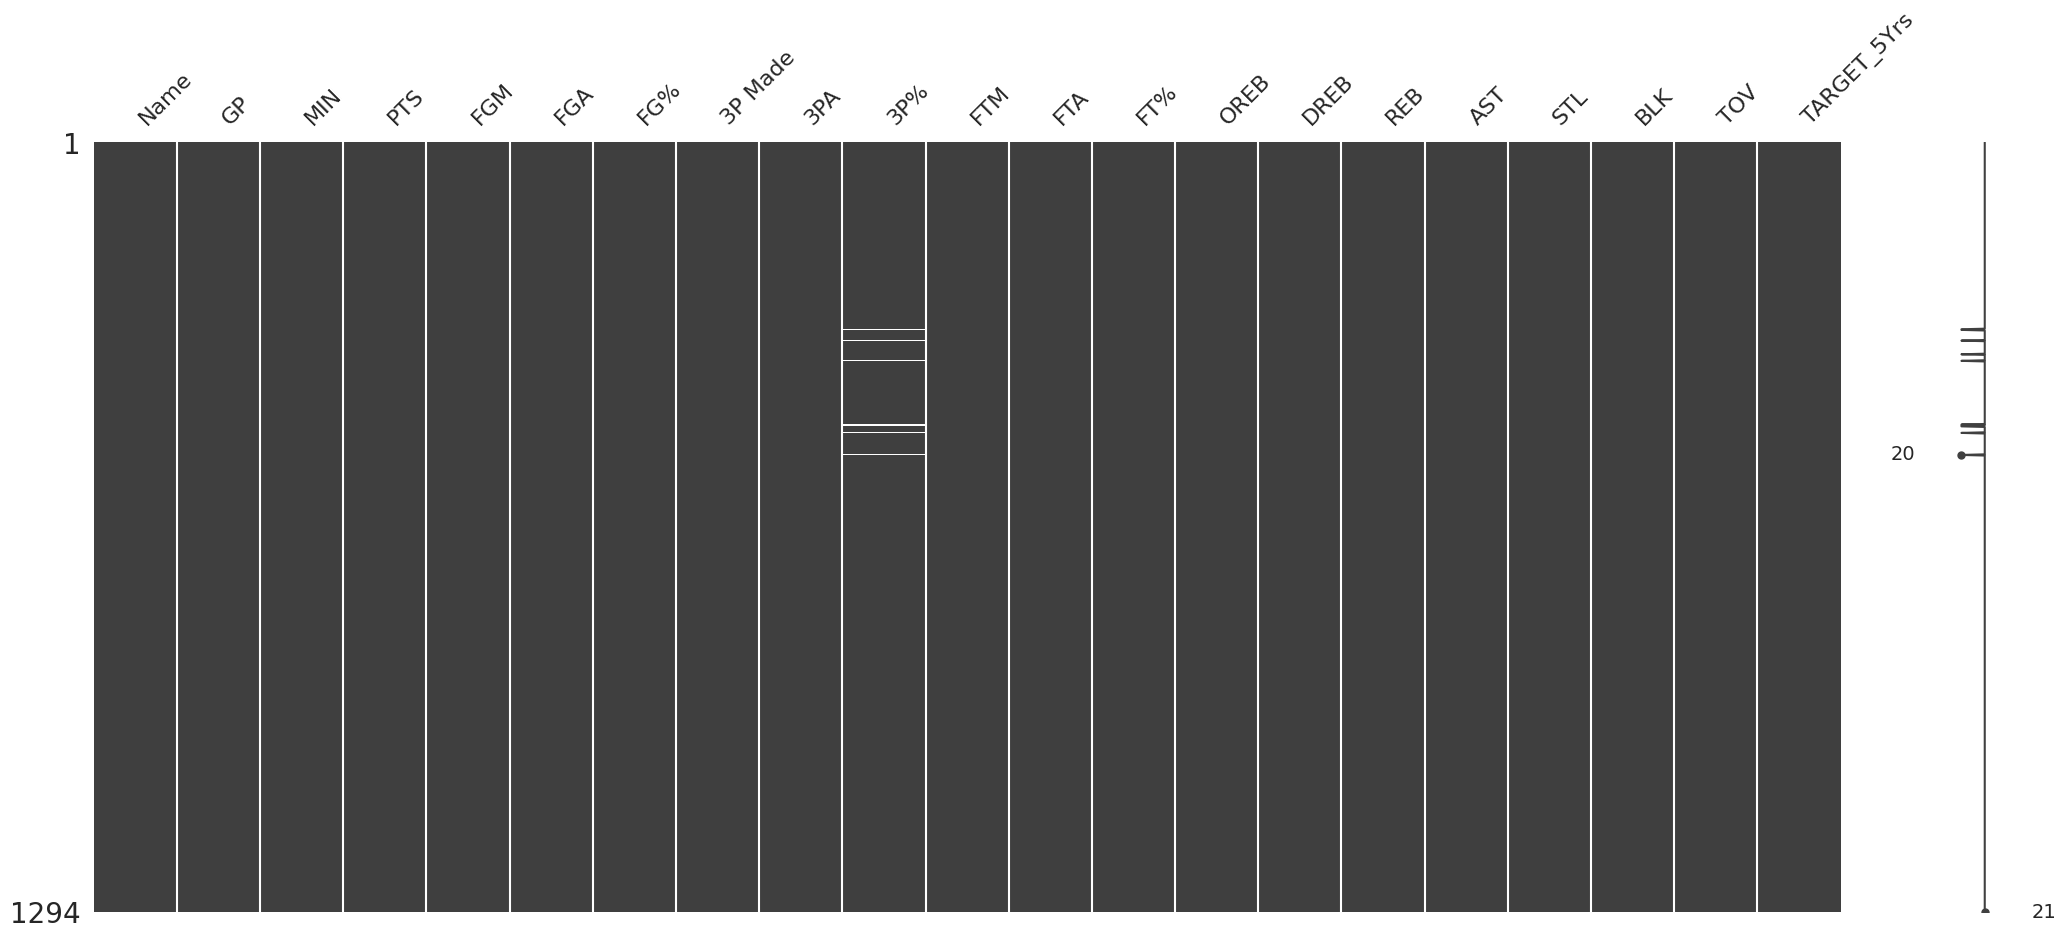

In [107]:
import missingno
missingno.matrix(original_data)

La seule variable présentant des valeurs nulles est 3P% et comme cette variable présente une valeur aberrante(trouvée plus tard), on a décidé de remplacer ces valeurs par la médiane puisque le volume  des données qu'on dispose est faible.

In [108]:
original_data['3P%'] = original_data['3P%'].fillna(original_data['3P%'].median())

In [109]:
original_data.isnull().sum()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

## Détection des valeurs aberrantes

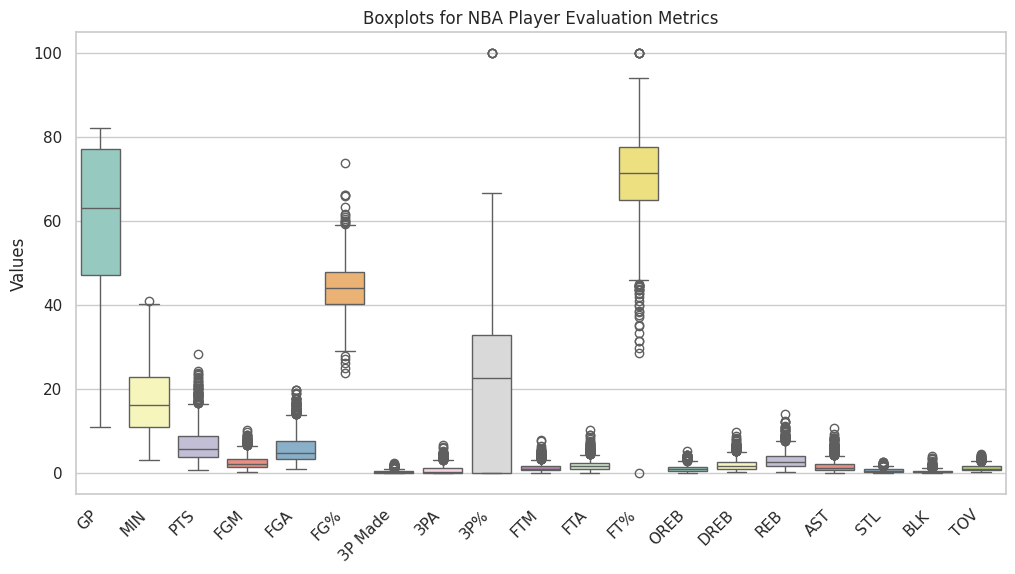

In [110]:
numeric_columns = original_data.drop(columns=['Name','TARGET_5Yrs'])
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_columns, palette="Set3")
plt.title('Boxplots for NBA Player Evaluation Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')
plt.show()

Interprétation: Pour chaque variable , les valeurs hors box représentent des valeurs aberrantes en se basant sur la représentation graphique de la méthode interquartile range (IQR)

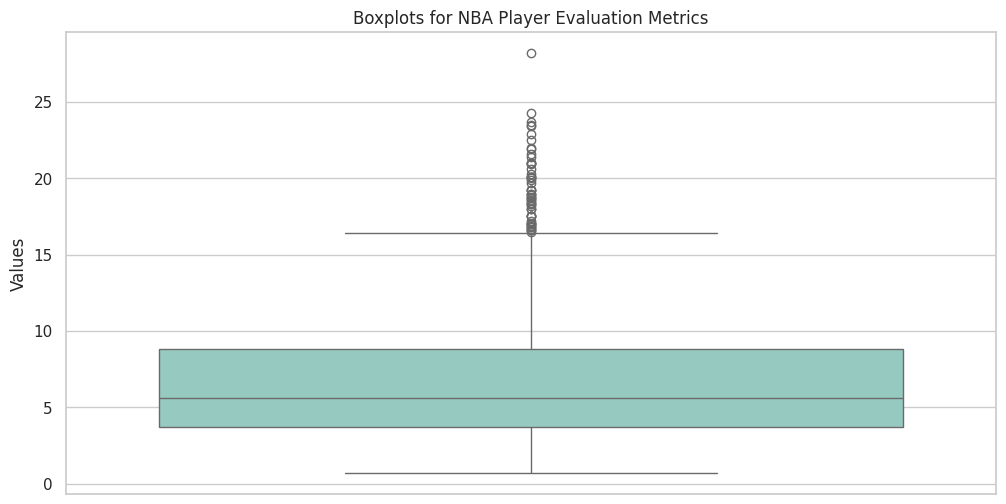

In [111]:

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=original_data['PTS'], palette="Set3")
plt.title('Boxplots for NBA Player Evaluation Metrics')
plt.ylabel('Values')


plt.xticks(rotation=45, ha='right')


plt.show()

Par exemple ici pour la variable PTS , il exsite des valeurs aberrantes qui ne représentent pas des erreurs mais peut être que les joueurs ont améliorer de performance durant certaines parties.


### Winsorizing with the interquartile range (IQR)

Comme le volume faible des données et la possibilité d'une perte d'information en supprimant ces valeurs aberrantes, on a opté par le remplacement de ces valeurs par les valeurs limite en utilisant la méthode IQR.

In [112]:
def winsorize_column(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[column_name] = np.where(df[column_name] < lower_limit, lower_limit,
                                                np.where(df[column_name] > upper_limit, upper_limit, df[column_name]))


In [113]:

for column_name in list(numeric_columns.columns):
          winsorize_column(original_data, column_name)


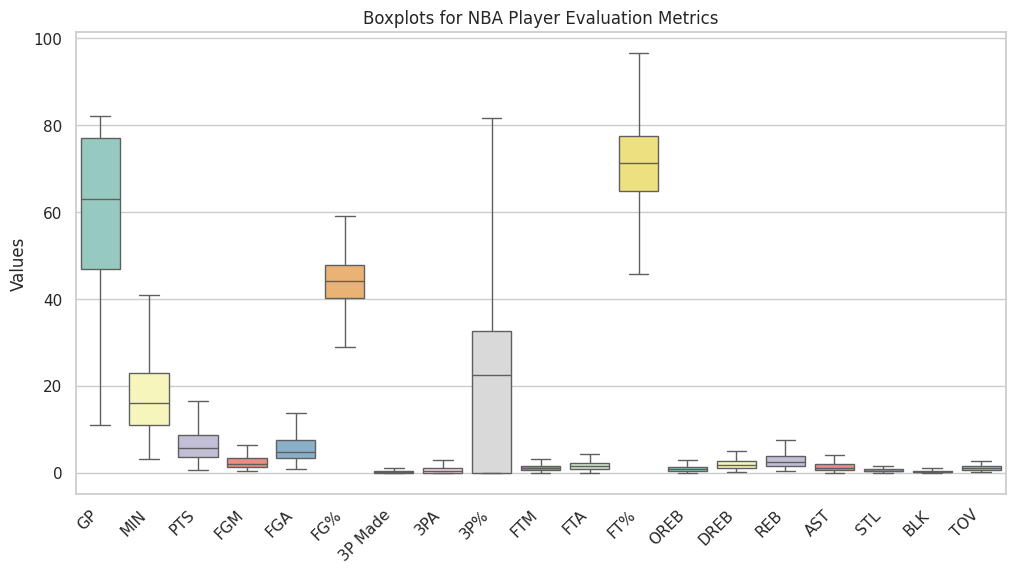

In [114]:
#verification
numeric_columns = original_data.drop(columns=['Name','TARGET_5Yrs'])
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_columns, palette="Set3")
plt.title('Boxplots for NBA Player Evaluation Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')
plt.show()

## Histogramme des caractéristiques et représentation pairplot

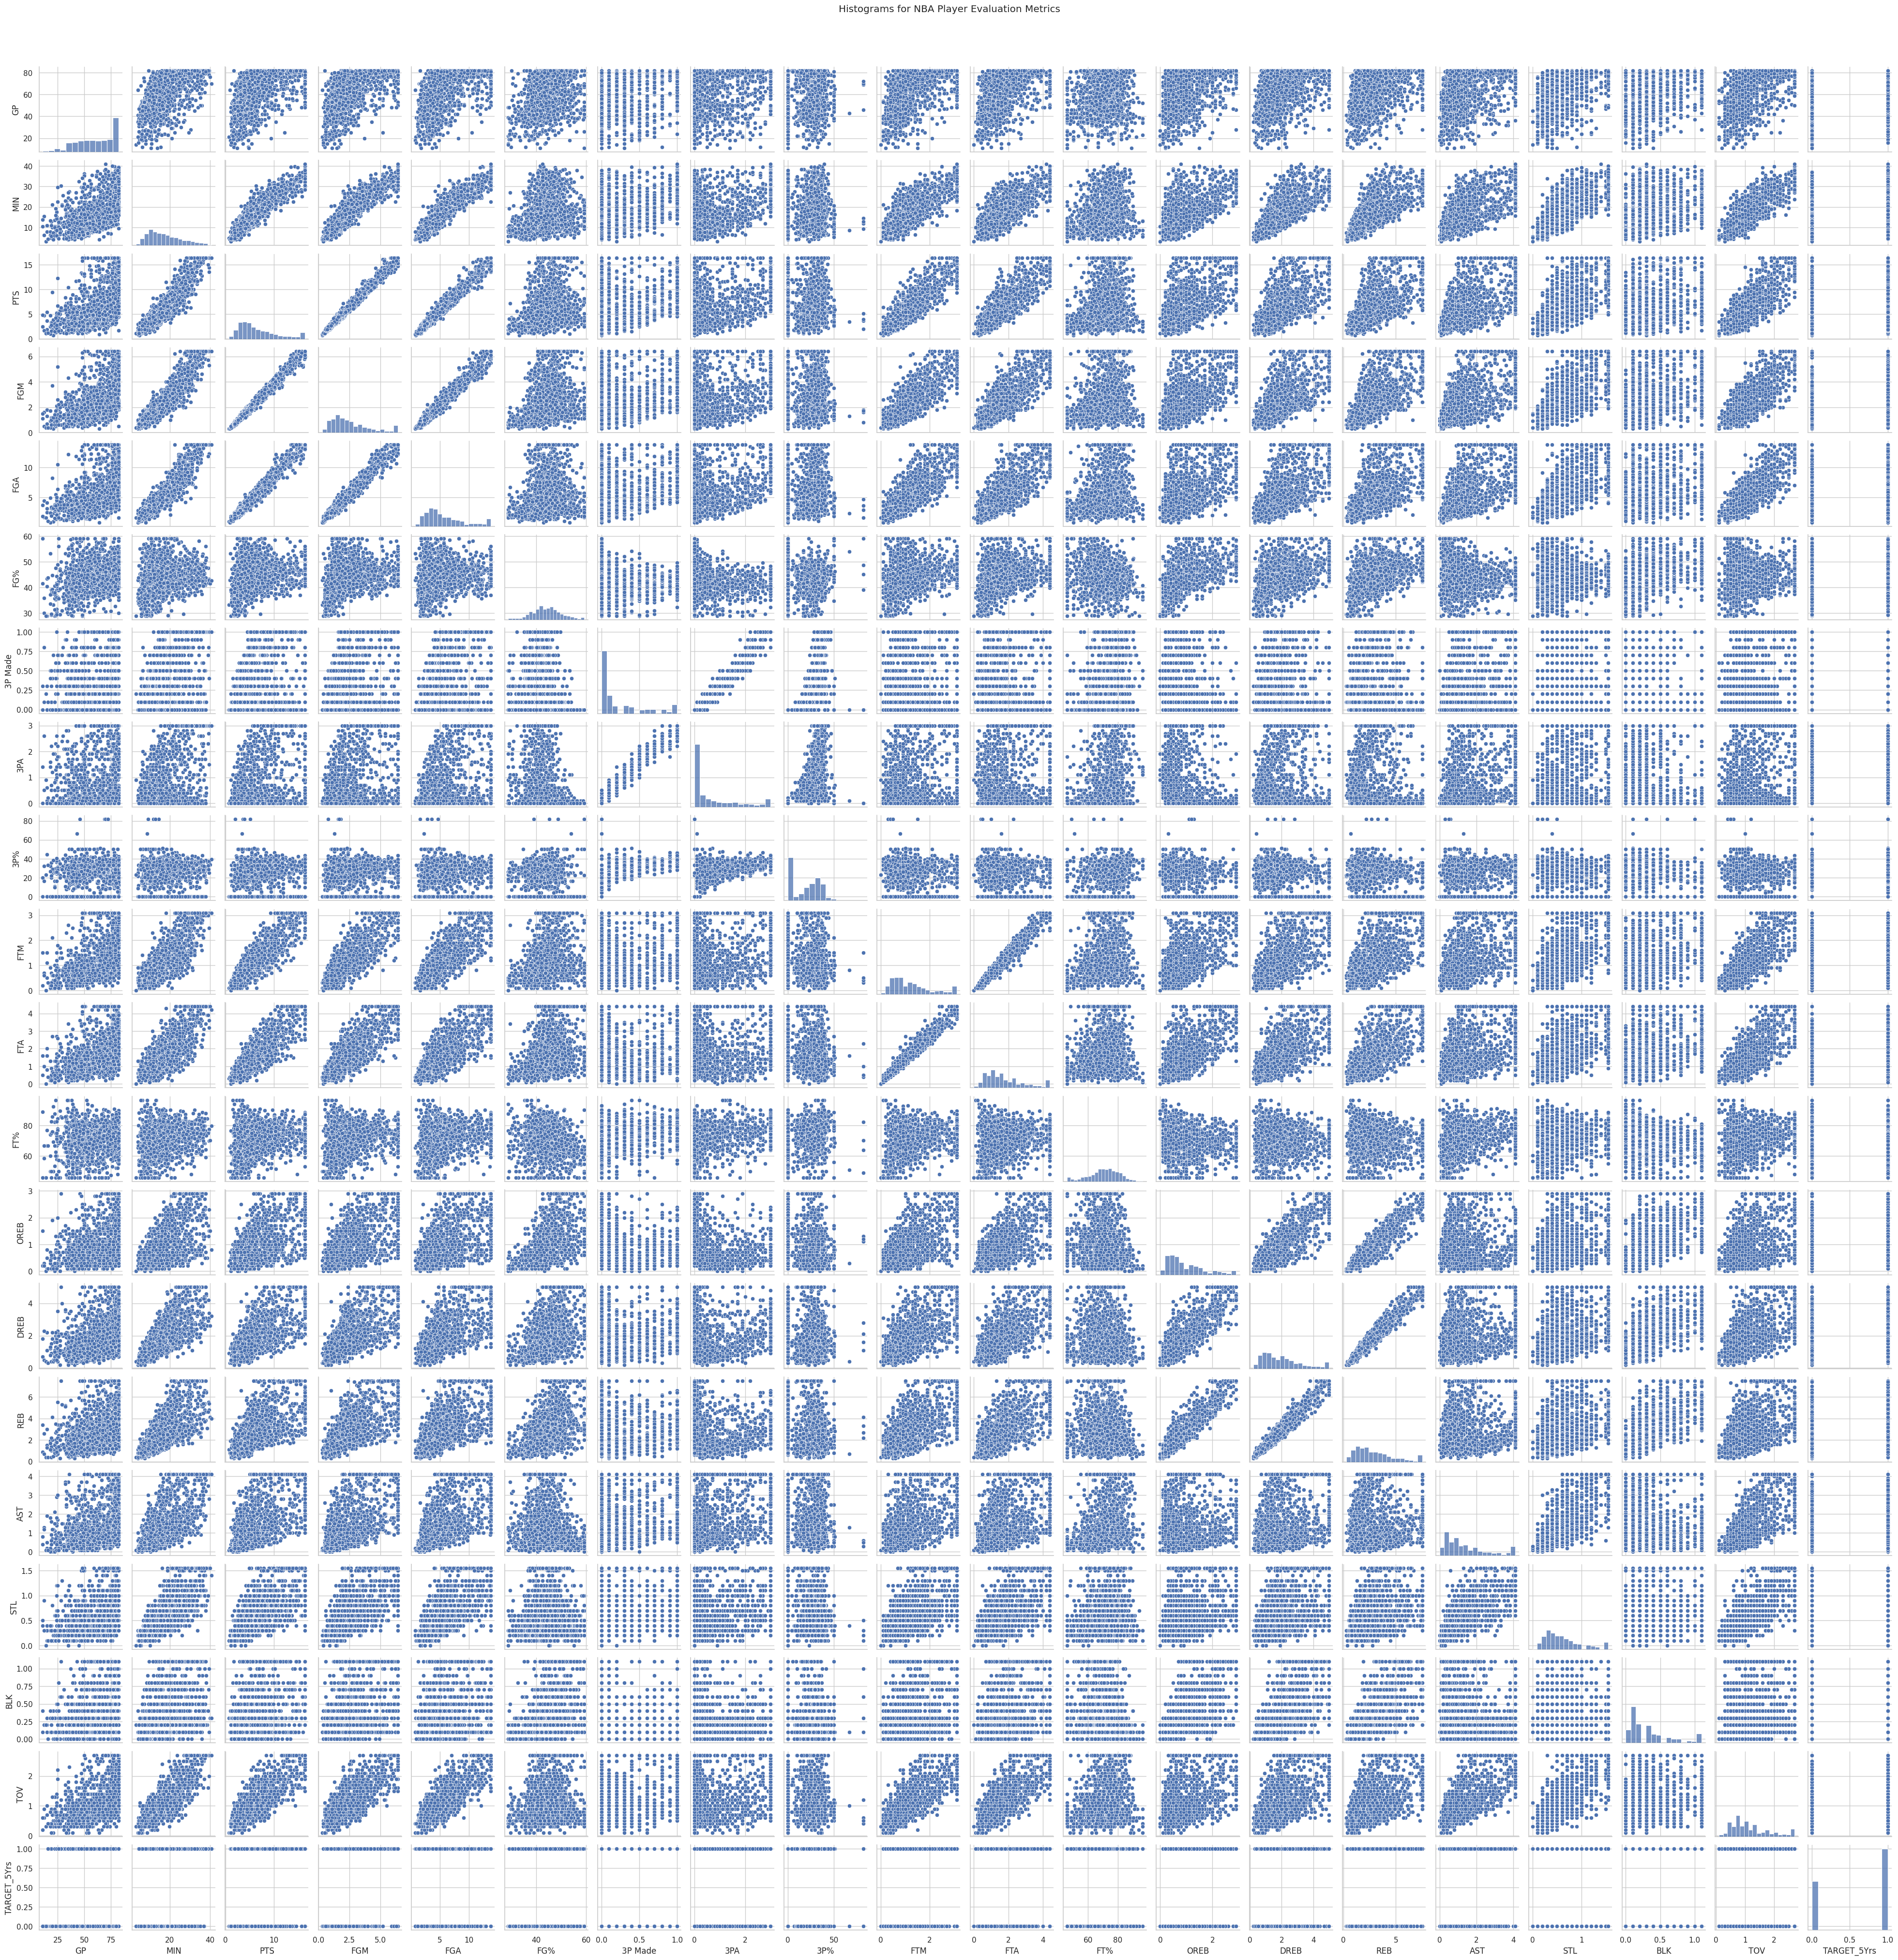

In [ ]:
numeric_columns = original_data.drop(columns=['Name','TARGET_5Yrs'])
sns.set(style="whitegrid")  # Optional: Set a style for the plots
sns.pairplot(numeric_columns, height=2)
plt.suptitle('Histograms for NBA Player Evaluation Metrics', y=1.02)
plt.show()

## Matrice de corrélation

In [115]:
data=original_data.drop(columns=['Name','TARGET_5Yrs'])

In [116]:
correlation_matrix = data.corr()


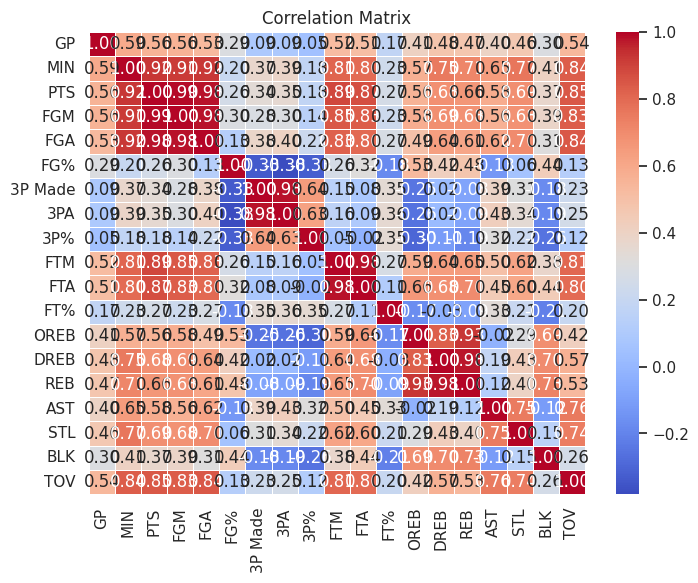

In [117]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Interprétation de la matrice de corrélation et de la représentation pairplot : comme on dispose des variables numériques continues, on a pu explorer la matrice de corrélation; les variables MIN, PTS, FGMM, FGA sont fortement corrélés ce qui paraît légitime et logique puisque le joueur ne serait capable de performer que s'il est en train de jouer sur terrain.

De la même manière,(FTM, FTA) et (3PA, 3P Made) sont corrélées séparément . De plus, les actions rebound en défense et attaque sont fortement corrélés.

On remarque aussi que les actions prises par le joueur (STL, AST, REB, DREB, OREBB) sont plus au moins corrélés avec le nombre de minutes jouées et points gagnés par le joueur ce qui montre que la performance de joueur et ses actions sont proportionnelles au temps de sa présence sur terrain ce qui paraît raisonnable.

Conclusion: Cette forte corrélation entre des sous-groupes de variables de nos données peut provoquer une redan once d'information et une instabilité au niveau de performance des modèles choisis. On va analyser deux idées d'analyse:Soit une réduction de dimension des sous-groupes de variable via PCA (principal component analysis), soit une création des nouvelles variables représentatives mais avant d'entamer cette étape, on doit comprendre l'importance des caractéristiques et leur impact sur la caractéristique (variable) cible via la méthode SHAP value.

## Analyse de la variable cible:


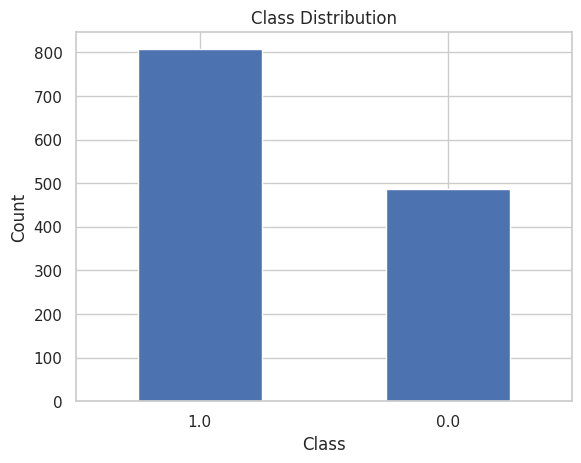

In [118]:
class_distribution = original_data['TARGET_5Yrs'].value_counts()
class_distribution.plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

On remarque qu'il y a une petite différence entre le nombre d'échantillons de chaque classe, d'o`u la nécessité d'utiliser des métriques qui prennent en considération la précision et la sensibilité(recall function) comme F1 score par exemple.

## Importance des caractéristiques via méthode SHAP

SHAP (SHapley Additive exPlanations) de Lundberg et Lee (2016) [1] est une méthode pour expliquer les prédictions individuelles. SHAP est basé sur les valeurs de Shapley théoriquement optimales du jeu.

L’objectif de SHAP est d’expliquer la prédiction d’une instance x en calculant la contribution de chaque caractéristique à la prédiction. La méthode d’explication SHAP calcule les valeurs de Shapley à partir de la théorie des jeux de coalition. Les valeurs de caractéristique d’une instance de données agissent en tant que joueurs dans une coalition. Les valeurs de Shapley nous indiquent comment répartir équitablement le « paiement » (= la prédiction) parmi les caractéristiques.

In [ ]:
y=original_data['TARGET_5Yrs']
x=original_data.drop(columns=['Name','TARGET_5Yrs'])
list_columns=list(x.columns)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)



Puisque les distributions des variables ne sont pas gaussiennes, on a opté pour une normalisation MinMax.

In [ ]:
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
X_train= pd.DataFrame(X_train,columns=list_columns)
X_test= pd.DataFrame(X_test,columns=list_columns)

In [ ]:
lazy_classifier = LazyClassifier()
models, predictions = lazy_classifier.fit(X_train, X_test, y_train, y_test)

# Print the model performance
print(models)

Interprétation: Une utilisation de librairie lazy predict nous facilite la sélection primaire des modèles: SVC,RandomForest et LogisticRegression

In [ ]:
classifier = sklearn.ensemble.RandomForestClassifier(max_depth=50, random_state=0)
classifier.fit(X_train, y_train)

  0%|          | 0/647 [00:00<?, ?it/s]

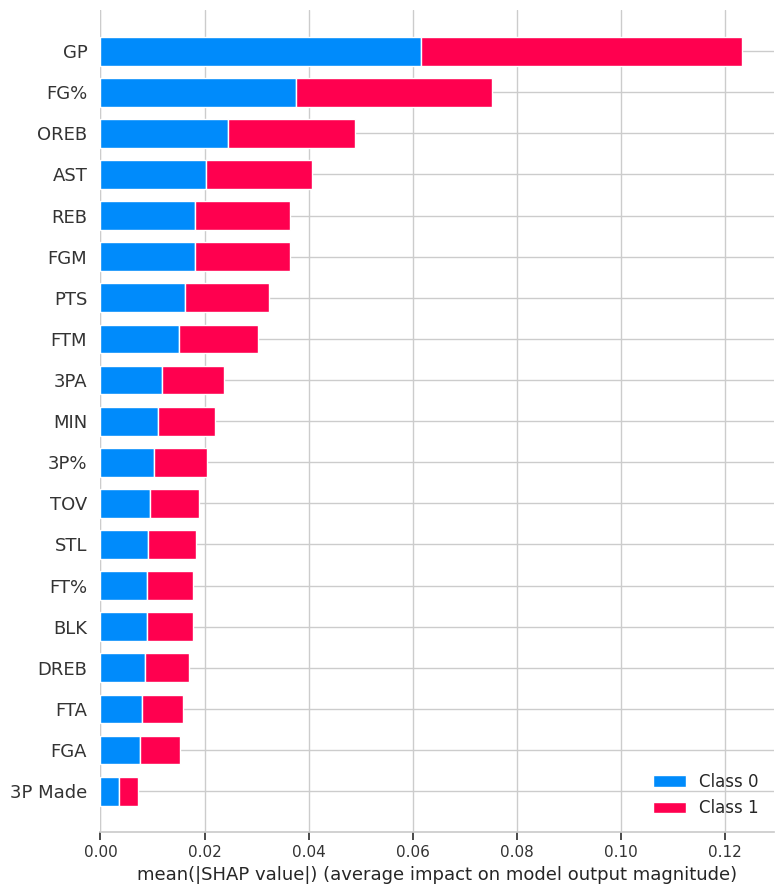

In [ ]:
explainer = shap.KernelExplainer(classifier.predict_proba,X_train)
#compute shap_values
shap_values = explainer.shap_values(X_test, approximate=True)
# visualize the prediction's explanation
shap.summary_plot(shap_values, X_test)

[1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.

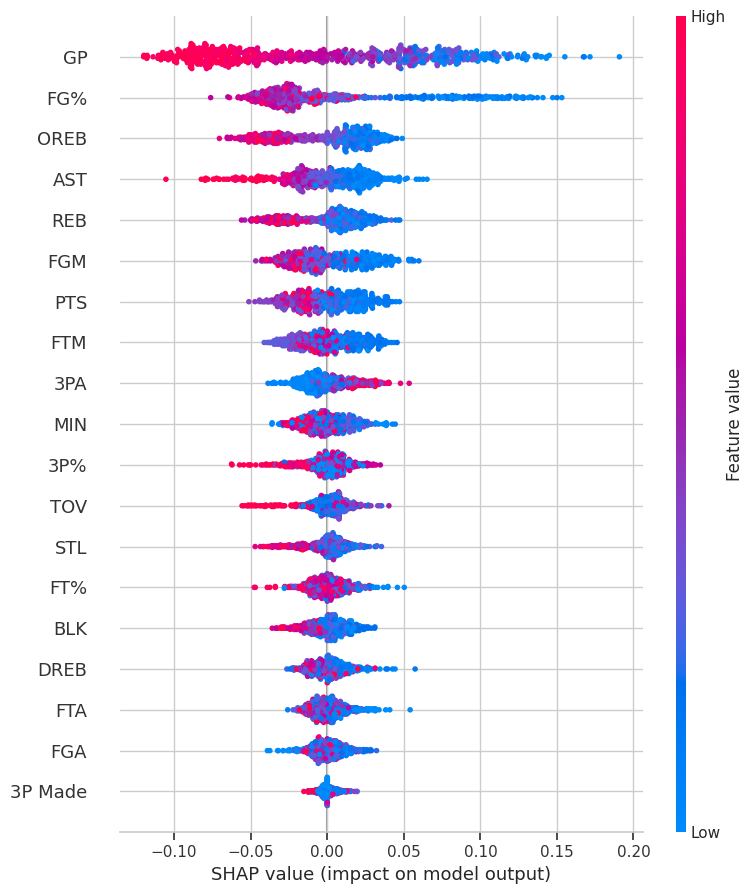

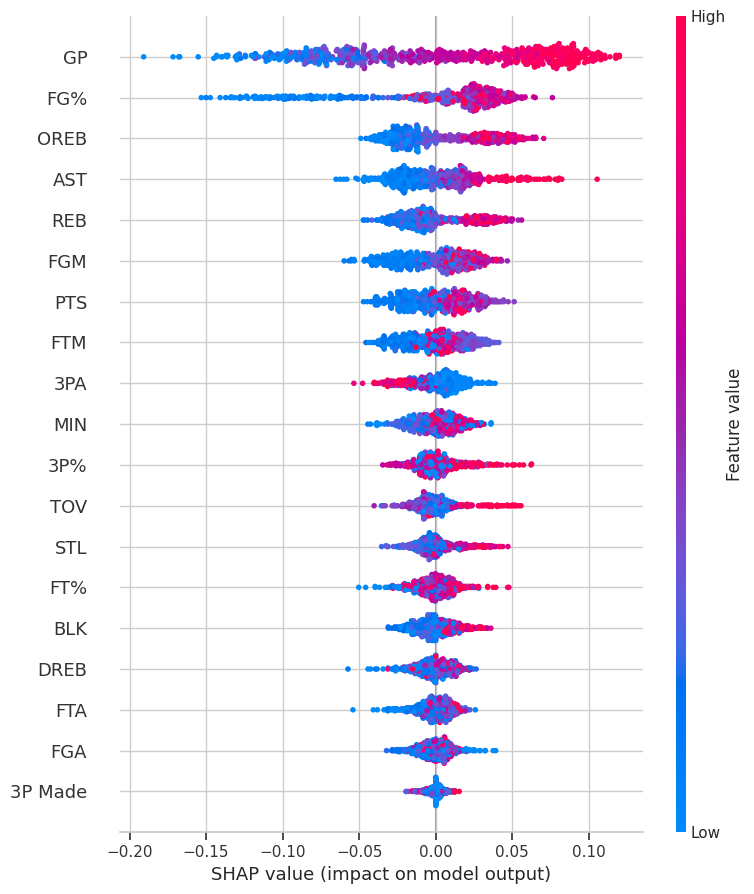

In [ ]:
y_pred=classifier.predict(X_test)
print(y_pred)
shap.summary_plot(shap_values[0], X_test)#class 0
shap.summary_plot(shap_values[1], X_test)#class 1


Interprétation:
Dans ce graphique, l’importance de la caractéristique SHAP est mesurée comme les valeurs absolues moyennes de Shapley

En tant que première observation du graphique d’importance des caractéristiques SHAP en choisissant le modèle RandomForest, nous pouvons dire que la caractéristique GP et FG% ont l’impact le plus important sur la prédiction de la classe (augmentant ou diminuant) en modifiant la probabilité de classe prédite en moyenne de 10% et 8%, on peut remarquer aussi que les caractéristiques 3PM,FTA et FGA ont un impact faible au alentour de 0.1% sur le résultat de prédiction pour chaque classe 0 et 1. On peut donc dire qu’elles ont le moins d’impact parmi toutes les caractéristiques sur la prédiction de le nombre d'année de prsésence en nba.

Une sélection de variables et création  de nouvelles caractéristiques peut être une perspective à prendre en considération en se basant sur ce modèle comme référence.

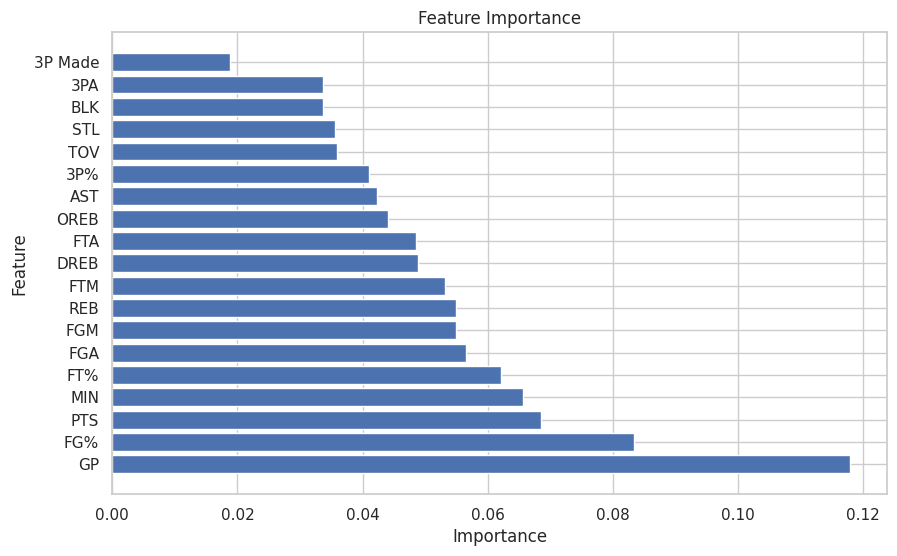

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
feature_importances = rf_classifier.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

## Réduction de dimension

Comme il existe des sous-groupes de variables fortement corrélées, une réduction de dimension de ces groupes via la méthode PCA peut être considérée.

In [27]:
y=original_data['TARGET_5Yrs']
x=original_data.drop(columns=['Name','TARGET_5Yrs'])
list_columns=list(x.columns)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)


scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
X_train= pd.DataFrame(X_train,columns=list_columns)
X_test= pd.DataFrame(X_test,columns=list_columns)

### PCA

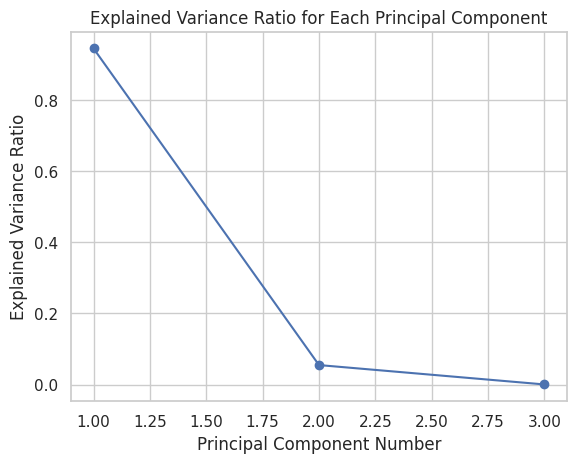

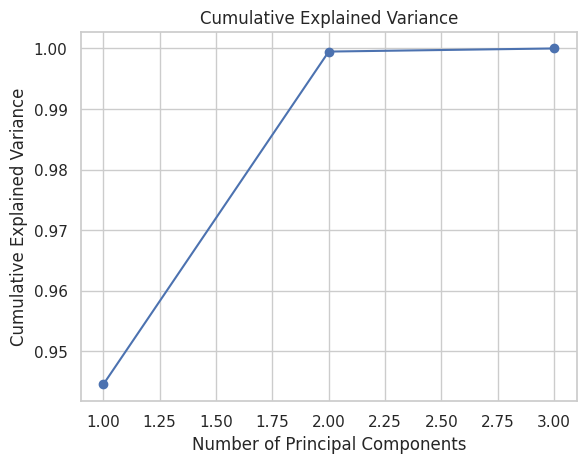

In [28]:
#first set of correlated features
selected_columns = X_train[['DREB','OREB' , 'REB']]
selected_columns_test = X_test[['DREB','OREB' , 'REB']]
n_components = 3

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(selected_columns)
# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Plot the cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [29]:
loadings = pca.components_
loadings_df = pd.DataFrame(data=loadings, columns=selected_columns.columns)
loadings_df

DREB  OREB  REB
0  0.58  0.55 0.60
1  0.63 -0.77 0.11
2 -0.52 -0.31 0.79

Comme le premier composant représente plus que 90% de la variance cumulée donc de l'information totale , on a décidé de projeter les données sur un seul composant.

In [30]:
n_components = 1

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(selected_columns)
columns = [f'PC{i+1}' for i in range(n_components)]
principal_df_reb = pd.DataFrame(data=principal_components, columns=columns)
principal_components_test = pca.transform(selected_columns_test)
columns = [f'PC{i+1}' for i in range(n_components)]
principal_df_reb_test = pd.DataFrame(data=principal_components_test, columns=columns)

In [31]:
principal_df_reb

PC1
0   -0.35
1    0.11
2   -0.10
3    0.33
4   -0.33
..    ...
900 -0.34
901  0.35
902  0.25
903 -0.08
904  0.37

[905 rows x 1 columns]

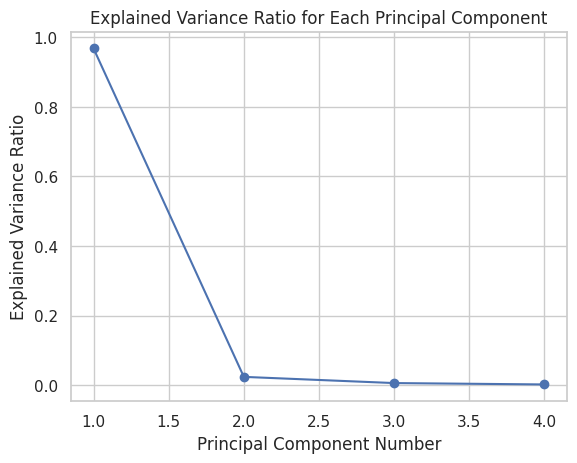

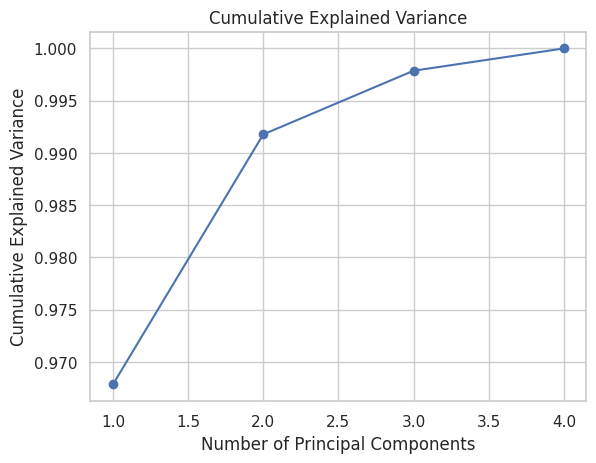

In [32]:
#second set of correlated features
selected_columns = X_train[['MIN','PTS' , 'FGM','FGA']]
selected_columns_test = X_test[['MIN','PTS' , 'FGM','FGA']]
n_components = 4

pca_goal = PCA(n_components=n_components)
principal_components = pca_goal.fit_transform(selected_columns)
# Plot the explained variance ratio
explained_variance_ratio = pca_goal.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Plot the cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [33]:
loadings = pca_goal.components_
loadings_df = pd.DataFrame(data=loadings, columns=selected_columns.columns)
loadings_df

MIN   PTS   FGM   FGA
0  0.44  0.52  0.52  0.52
1  0.90 -0.23 -0.30 -0.24
2  0.02  0.37  0.43 -0.82
3 -0.05  0.74 -0.67 -0.02

In [34]:
n_components = 1

pca_goal = PCA(n_components=n_components)
principal_components = pca_goal.fit_transform(selected_columns)
columns = [f'PC{i+1}' for i in range(n_components)]
principal_df_goal = pd.DataFrame(data=principal_components, columns=columns)
principal_components_test = pca_goal.transform(selected_columns_test)
columns = [f'PC{i+1}' for i in range(n_components)]
principal_df_goal_test = pd.DataFrame(data=principal_components_test, columns=columns)

In [35]:
principal_df_goal_test

PC1
0   -0.23
1   -0.32
2   -0.35
3   -0.36
4   -0.22
..    ...
384  0.46
385 -0.43
386 -0.36
387 -0.11
388 -0.40

[389 rows x 1 columns]

In [36]:
X_train

GP  MIN  PTS  FGM  FGA  FG%  3P Made  3PA  3P%  FTM  FTA  FT%  OREB  \
0   0.15 0.20 0.11 0.08 0.17 0.00     0.50 0.63 0.32 0.10 0.09 0.82  0.00   
1   0.75 0.54 0.63 0.57 0.59 0.50     0.00 0.07 0.37 1.00 1.00 0.42  0.48   
2   0.45 0.25 0.14 0.16 0.18 0.42     0.00 0.00 0.00 0.13 0.18 0.05  0.34   
3   0.87 0.39 0.31 0.31 0.26 0.82     0.00 0.00 0.00 0.35 0.41 0.30  0.55   
4   0.99 0.34 0.25 0.26 0.28 0.43     0.30 0.30 0.38 0.19 0.20 0.52  0.10   
..   ...  ...  ...  ...  ...  ...      ...  ...  ...  ...  ...  ...   ...   
900 0.15 0.08 0.05 0.05 0.05 0.39     0.00 0.00 0.00 0.13 0.11 0.41  0.17   
901 0.58 0.48 0.56 0.56 0.52 0.66     0.00 0.03 0.17 0.68 0.70 0.43  0.52   
902 0.86 0.31 0.28 0.25 0.30 0.33     0.00 0.00 1.00 0.48 0.52 0.35  0.45   
903 0.17 0.44 0.21 0.21 0.36 0.01     0.60 0.77 0.32 0.06 0.07 0.33  0.24   
904 0.85 0.36 0.26 0.28 0.24 0.73     0.00 0.00 0.00 0.29 0.32 0.32  0.62   

     DREB  REB  AST  STL  BLK  TOV  
0    0.29 0.18 0.12 0.19 0.09 0.12  
1    0.38 0.43 0.27 0.58 0.18 0.50  
2    0.27 0.31 0.07 0.13 0.45 0.15  
3    0.54 0.57 0.10 0.26 1.00 0.35  
4    0.23 0.18 0.80 0.32 0.09 0.38  
..    ...  ...  ...  ...  ...  ...  
900  0.17 0.17 0.00 0.13 0.09 0.15  
901  0.58 0.58 0.29 0.26 0.27 0.42  
902  0.54 0.53 0.15 0.19 0.91 0.42  
903  0.38 0.33 0.22 0.39 0.09 0.23  
904  0.52 0.58 0.12 0.26 0.73 0.23  

[905 rows x 19 columns]

In [37]:
X_train.drop(columns=['MIN','PTS' , 'FGM','FGA'],inplace=True)
X_train['PC1']=principal_df_goal['PC1']
X_test.drop(columns=['MIN','PTS' , 'FGM','FGA'],inplace=True)
X_test['PC1']=principal_df_goal_test['PC1']

In [38]:
X_train.drop(columns=['REB','OREB' , 'DREB'],inplace=True)
X_train['PC2']=principal_df_reb['PC1']
X_test.drop(columns=['REB','OREB' , 'DREB'],inplace=True)
X_test['PC2']=principal_df_reb_test['PC1']

In [39]:
X_train

GP  FG%  3P Made  3PA  3P%  FTM  FTA  FT%  AST  STL  BLK  TOV   PC1  \
0   0.15 0.00     0.50 0.63 0.32 0.10 0.09 0.82 0.12 0.19 0.09 0.12 -0.48   
1   0.75 0.50     0.00 0.07 0.37 1.00 1.00 0.42 0.27 0.58 0.18 0.50  0.41   
2   0.45 0.42     0.00 0.00 0.00 0.13 0.18 0.05 0.07 0.13 0.45 0.15 -0.40   
3   0.87 0.82     0.00 0.00 0.00 0.35 0.41 0.30 0.10 0.26 1.00 0.35 -0.13   
4   0.99 0.43     0.30 0.30 0.38 0.19 0.20 0.52 0.80 0.32 0.09 0.38 -0.20   
..   ...  ...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
900 0.15 0.39     0.00 0.00 0.00 0.13 0.11 0.41 0.00 0.13 0.09 0.15 -0.65   
901 0.58 0.66     0.00 0.03 0.17 0.68 0.70 0.43 0.29 0.26 0.27 0.42  0.30   
902 0.86 0.33     0.00 0.00 1.00 0.48 0.52 0.35 0.15 0.19 0.91 0.42 -0.20   
903 0.17 0.01     0.60 0.77 0.32 0.06 0.07 0.33 0.22 0.39 0.09 0.23 -0.16   
904 0.85 0.73     0.00 0.00 0.00 0.29 0.32 0.32 0.12 0.26 0.73 0.23 -0.20   

      PC2  
0   -0.35  
1    0.11  
2   -0.10  
3    0.33  
4   -0.33  
..    ...  
900 -0.34  
901  0.35  
902  0.25  
903 -0.08  
904  0.37  

[905 rows x 14 columns]

In [119]:

#X_train.drop(columns=['3PA','3P Made','FTA','FTM'],inplace=True)
#X_test.drop(columns=['3PA','3P Made','FTA','FTM'],inplace=True)

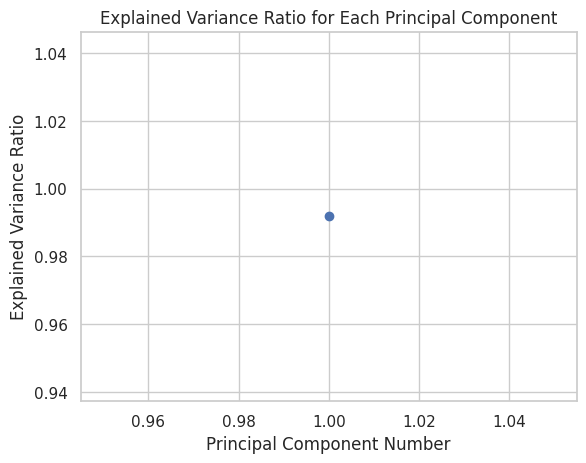

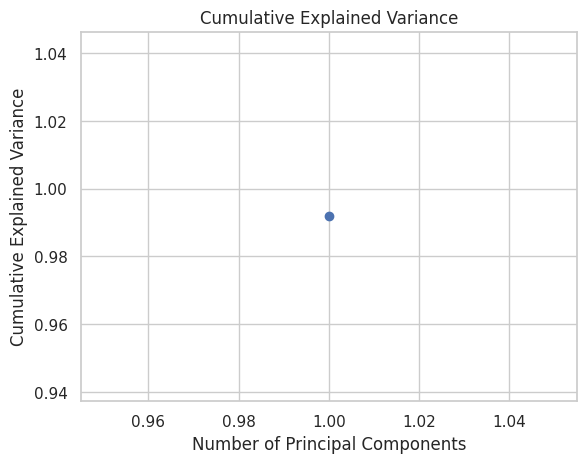

In [40]:
# pca partiel pour les variables 3PA ET 3P Made aussi
selected_columns = X_train[['3PA','3P Made']]
selected_columns_test = X_test[['3PA','3P Made']]
n_components = 1

pca_3p = PCA(n_components=n_components)
principal_components = pca_3p.fit_transform(selected_columns)

explained_variance_ratio = pca_3p.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.show()

cumulative_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()



pca_3p = PCA(n_components=1)
principal_components = pca_3p.fit_transform(selected_columns)
columns = [f'PC{i+1}' for i in range(1)]
principal_df_3p = pd.DataFrame(data=principal_components, columns=columns)
principal_components_test = pca_3p.transform(selected_columns_test)
columns = [f'PC{i+1}' for i in range(1)]
principal_df_3p_test = pd.DataFrame(data=principal_components_test, columns=columns)

In [41]:
X_train.drop(columns=['3PA','3P Made'],inplace=True)
X_train['PC3_3P']=principal_df_3p['PC1']
X_test.drop(columns=['3PA','3P Made'],inplace=True)
X_test['PC3_3P']=principal_df_3p_test['PC1']

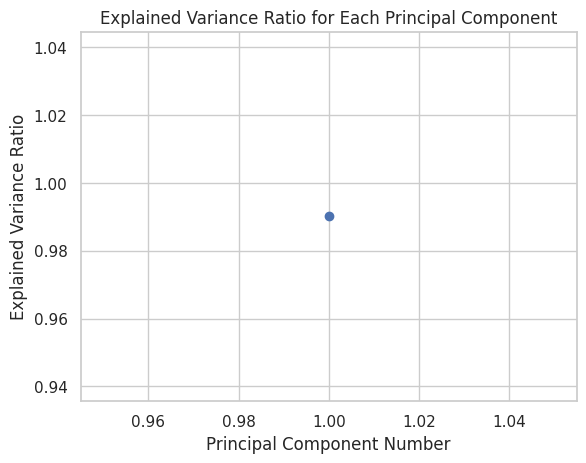

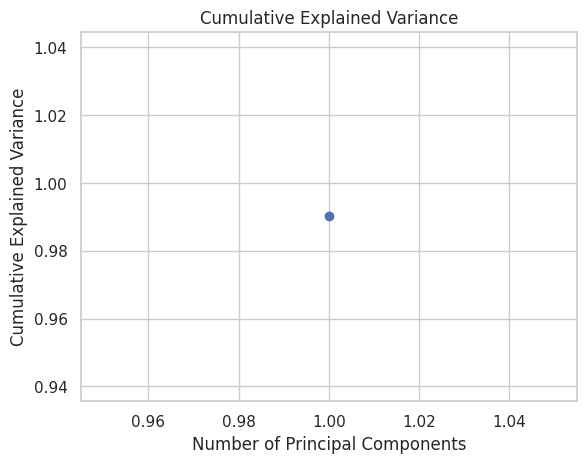

In [42]:
 #pca partiel pour les variables FTA ET FTM  aussi
selected_columns = X_train[['FTA','FTM']]
selected_columns_test = X_test[['FTA','FTM']]
n_components = 1

pca_FT = PCA(n_components=n_components)
principal_components = pca_FT.fit_transform(selected_columns)

explained_variance_ratio = pca_FT.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.show()

cumulative_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()



pca_FT = PCA(n_components=1)
principal_components = pca_FT.fit_transform(selected_columns)
columns = [f'PC{i+1}' for i in range(1)]
principal_df_FT = pd.DataFrame(data=principal_components, columns=columns)
principal_components_test = pca_FT.transform(selected_columns_test)
columns = [f'PC{i+1}' for i in range(1)]
principal_df_FT_test = pd.DataFrame(data=principal_components_test, columns=columns)

In [43]:
X_train.drop(columns=['FTA','FTM'],inplace=True)
X_train['PC4_FT']=principal_df_FT['PC1']
X_test.drop(columns=['FTA','FTM'],inplace=True)
X_test['PC4_FT']=principal_df_FT_test['PC1']

In [44]:
X_train

GP  FG%  3P%  FT%  AST  STL  BLK  TOV   PC1   PC2  PC3_3P  PC4_FT
0   0.15 0.00 0.32 0.82 0.12 0.19 0.09 0.12 -0.48 -0.35    0.47   -0.44
1   0.75 0.50 0.37 0.42 0.27 0.58 0.18 0.50  0.41  0.11   -0.28    0.85
2   0.45 0.42 0.00 0.05 0.07 0.13 0.45 0.15 -0.40 -0.10   -0.33   -0.35
3   0.87 0.82 0.00 0.30 0.10 0.26 1.00 0.35 -0.13  0.33   -0.33   -0.03
4   0.99 0.43 0.38 0.52 0.80 0.32 0.09 0.38 -0.20 -0.33    0.10   -0.29
..   ...  ...  ...  ...  ...  ...  ...  ...   ...   ...     ...     ...
900 0.15 0.39 0.00 0.41 0.00 0.13 0.09 0.15 -0.65 -0.34   -0.33   -0.40
901 0.58 0.66 0.17 0.43 0.29 0.26 0.27 0.42  0.30  0.35   -0.30    0.41
902 0.86 0.33 1.00 0.35 0.15 0.19 0.91 0.42 -0.20  0.25   -0.33    0.14
903 0.17 0.01 0.32 0.33 0.22 0.39 0.09 0.23 -0.16 -0.08    0.64   -0.47
904 0.85 0.73 0.00 0.32 0.12 0.26 0.73 0.23 -0.20  0.37   -0.33   -0.14

[905 rows x 12 columns]

In [45]:
X_test

GP  FG%  3P%  FT%  AST  STL  BLK  TOV   PC1   PC2  PC3_3P  PC4_FT
0   0.94 0.67 0.00 0.41 0.32 0.26 0.18 0.46 -0.23  0.08   -0.30   -0.06
1   0.54 0.48 0.00 0.27 0.20 0.26 0.00 0.15 -0.32 -0.28   -0.33   -0.18
2   0.15 0.08 0.14 0.71 0.51 0.39 0.27 0.46 -0.35 -0.36   -0.07   -0.13
3   0.54 0.48 0.17 0.23 0.17 0.26 0.09 0.35 -0.36 -0.33   -0.30   -0.11
4   0.93 0.62 0.00 0.34 0.12 0.19 0.36 0.38 -0.22  0.11   -0.33    0.10
..   ...  ...  ...  ...  ...  ...  ...  ...   ...   ...     ...     ...
384 0.99 0.56 0.13 0.65 0.24 0.26 0.55 0.54  0.46  1.10   -0.28    0.80
385 0.38 0.39 0.00 0.36 0.07 0.13 0.36 0.15 -0.43 -0.30   -0.33   -0.34
386 0.69 0.42 0.32 0.71 0.17 0.13 0.09 0.23 -0.36 -0.28   -0.02   -0.22
387 0.94 0.38 0.45 0.47 0.37 0.45 0.27 0.42 -0.11  0.13   -0.21   -0.29
388 0.96 0.13 0.26 0.71 0.17 0.32 0.27 0.23 -0.40  0.05    0.00   -0.32

[389 rows x 12 columns]

### Analyse rapide de corrélation et importance des variables

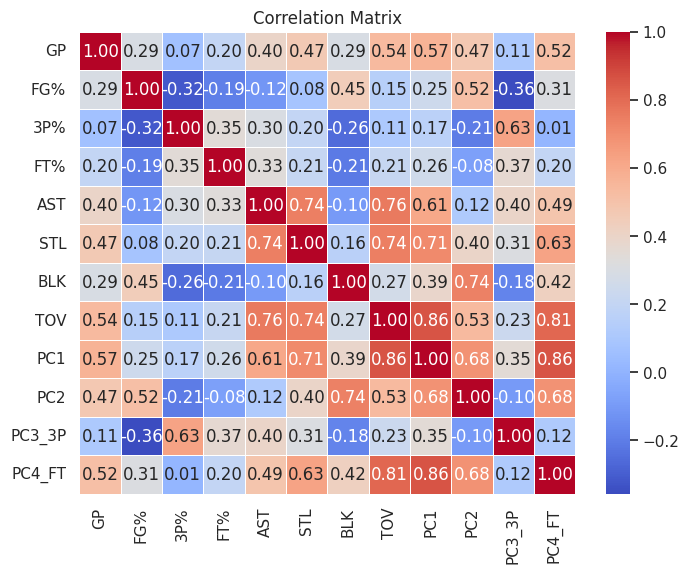

In [46]:
correlation_matrix = X_train.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

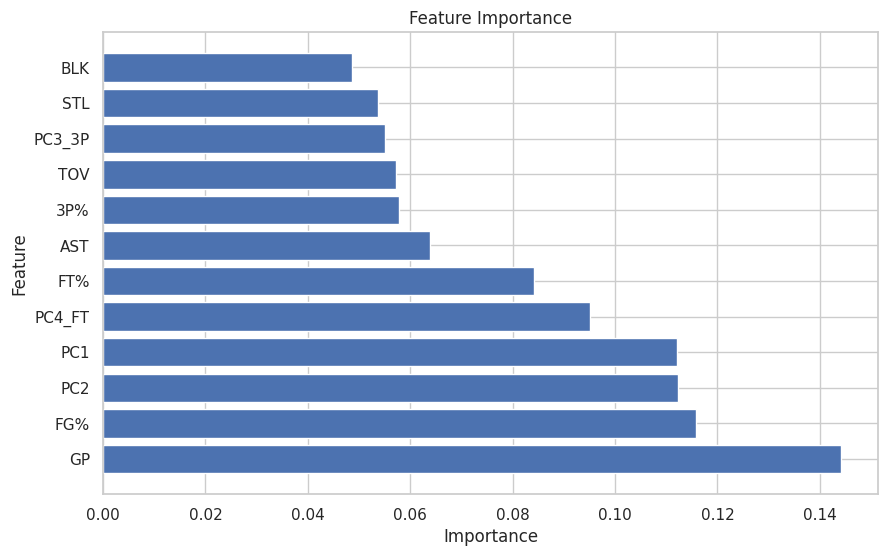

In [47]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
#print(rf_classifier.score(X_test, y_test))
feature_importances = rf_classifier.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Interprétation:
D'après la matrice de corrélation, malgré la réduction de dimension de sous groupes de variables corrélés, on remarque qu'il existe bien évidemment la forte corrélation entre les nouveaux composants(caractéristiques).Comme la performance des modèles choisis au début se limite à la présence de la forte corrélation, on doit procéder à une selection et création de nouvelles variables en se basant à la matrice de corrélation et sur leur importance par rapport à la prédiction.

### test de classification pour la réduction des dimensions

In [48]:
X_final = pd.concat([X_train, X_test],ignore_index=True)
Y_final = pd.concat([y_train, y_test],ignore_index=True)

In [49]:
X_final

GP  FG%  3P%  FT%  AST  STL  BLK  TOV   PC1   PC2  PC3_3P  PC4_FT
0    0.15 0.00 0.32 0.82 0.12 0.19 0.09 0.12 -0.48 -0.35    0.47   -0.44
1    0.75 0.50 0.37 0.42 0.27 0.58 0.18 0.50  0.41  0.11   -0.28    0.85
2    0.45 0.42 0.00 0.05 0.07 0.13 0.45 0.15 -0.40 -0.10   -0.33   -0.35
3    0.87 0.82 0.00 0.30 0.10 0.26 1.00 0.35 -0.13  0.33   -0.33   -0.03
4    0.99 0.43 0.38 0.52 0.80 0.32 0.09 0.38 -0.20 -0.33    0.10   -0.29
...   ...  ...  ...  ...  ...  ...  ...  ...   ...   ...     ...     ...
1289 0.99 0.56 0.13 0.65 0.24 0.26 0.55 0.54  0.46  1.10   -0.28    0.80
1290 0.38 0.39 0.00 0.36 0.07 0.13 0.36 0.15 -0.43 -0.30   -0.33   -0.34
1291 0.69 0.42 0.32 0.71 0.17 0.13 0.09 0.23 -0.36 -0.28   -0.02   -0.22
1292 0.94 0.38 0.45 0.47 0.37 0.45 0.27 0.42 -0.11  0.13   -0.21   -0.29
1293 0.96 0.13 0.26 0.71 0.17 0.32 0.27 0.23 -0.40  0.05    0.00   -0.32

[1294 rows x 12 columns]

In [50]:

labels = Y_final.values # labels


df_vals = X_final.values
#MODEL=SVC()
MODEL= LogisticRegression()
#MODEL=RandomForestClassifier(max_depth=50, random_state=0)
def score_classifier(dataset,classifier,labels):

    """
    performs 3 random trainings/tests to build a confusion matrix and prints results with precision and recall scores
    :param dataset: the dataset to work on
    :param classifier: the classifier to use
    :param labels: the labels used for training and validation
    :return:
    """

    kf = KFold(n_splits=3,random_state=50,shuffle=True)
    confusion_mat = np.zeros((2,2))
    recall = 0
    f1=0
    for training_ids,test_ids in kf.split(dataset):
        training_set = dataset[training_ids]
        training_labels = labels[training_ids]
        test_set = dataset[test_ids]
        test_labels = labels[test_ids]
        print(type(test_set))
        classifier.fit(training_set,training_labels)
        predicted_labels = classifier.predict(test_set)
        confusion_mat+=confusion_matrix(test_labels,predicted_labels)
        recall += recall_score(test_labels, predicted_labels)
        f1 += f1_score(test_labels, predicted_labels)
    recall/=3
    f1/=3
    print("F1 score",f1)
    print(confusion_mat)
    print("recall(sensitivity) score",recall)
score_classifier(df_vals,MODEL,labels)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
F1 score 0.7821816848453299
[[262. 225.]
 [144. 663.]]
recall(sensitivity) score 0.8236799238147356


## Selection et création des variables

In [140]:
y=original_data['TARGET_5Yrs']
x=original_data.drop(columns=['Name','TARGET_5Yrs'])



À cause de la forte corrélation entre PTS et MIN, on a créé une nouvelle caractéristique qui décrit l'efficacité de tir du joueur de basket-ball.

In [141]:
x['shooting efficiency_PTS/MIN'] = x['PTS'] / x['MIN']


In [142]:
x.drop(columns=['PTS','MIN'],inplace=True)

Comme les deux variables REB et DREB ont une importance significative sur le résultat de la prédiction et ils sont fortement corrélés, on a décidé de créer une nouvelle qui représente le ratio des rebounds défensifs.

In [143]:
x['ratio of defensive rebound_DREB/REB'] = x['DREB'] / x['REB']

In [144]:
x.drop(columns=['DREB','REB'],inplace=True)

En se basant  sur le graphique de l'importance des variables et le fait que 3P%,FT% et FG% représentent l'information donnée par '3P Made','3PA','FTM','FTA','FGA','FGM', on a opté pour la suppression de ses caractéristiques pour éviter la multicolinéarité et la redondance de l'information.

In [145]:
x.drop(columns=['OREB','3P Made','3PA','FTM','FTA','FGA','FGM'],inplace=True)


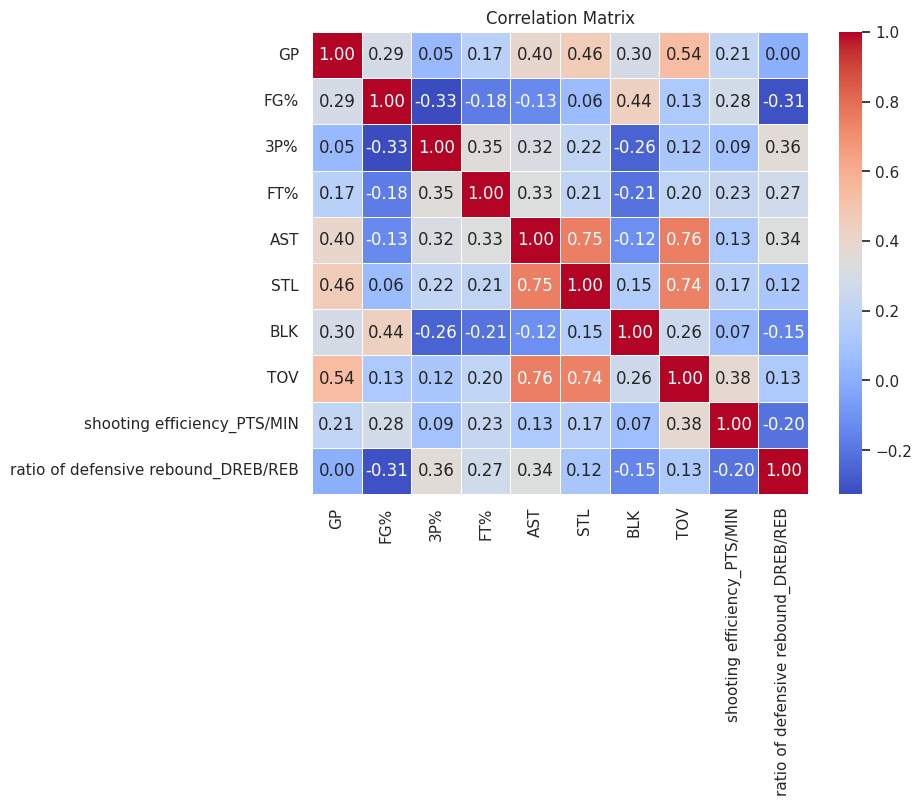

In [146]:
correlation_matrix = x.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Interprétation: Il s'agit d'une matrice de corrélation mieux adaptée pour les modèles utilisés; il existe des faibles et moyennes corrélations entre les variables ce qui aide à bien capter les différentes informations de ses caractéristiques.

In [147]:
x

GP   FG%   3P%   FT%  AST  STL  BLK  TOV  shooting efficiency_PTS/MIN  \
0    36.00 34.70 25.00 69.90 1.90 0.40 0.40 1.30                         0.27   
1    35.00 29.60 23.50 76.50 3.70 1.10 0.50 1.60                         0.27   
2    74.00 42.20 24.40 67.00 1.00 0.50 0.30 1.00                         0.34   
3    58.00 42.60 22.60 68.90 0.80 0.60 0.10 1.00                         0.49   
4    48.00 52.40  0.00 67.40 0.30 0.30 0.40 0.80                         0.39   
...    ...   ...   ...   ...  ...  ...  ...  ...                          ...   
1334 80.00 43.30 14.30 79.20 2.50 0.60 0.20 0.80                         0.27   
1336 68.00 35.80 16.70 79.40 2.30 0.80 0.00 1.30                         0.31   
1337 43.00 55.00  0.00 64.30 0.30 0.30 0.40 0.90                         0.45   
1338 52.00 43.90 10.00 62.50 2.20 0.40 0.10 0.80                         0.38   
1339 47.00 36.90 33.30 67.30 1.40 0.70 0.10 0.90                         0.38   

      ratio of defensive rebound_DREB/REB  
0                                    0.83  
1                                    0.83  
2                                    0.77  
3                                    0.47  
4                                    0.60  
...                                   ...  
1334                                 0.67  
1336                                 0.73  
1337                                 0.61  
1338                                 0.57  
1339                                 0.78  

[1294 rows x 10 columns]

In [148]:
y

0      0.00
1      0.00
2      0.00
3      1.00
4      1.00
       ... 
1334   0.00
1336   1.00
1337   0.00
1338   1.00
1339   1.00
Name: TARGET_5Yrs, Length: 1294, dtype: float64

In [151]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)
scaler_final = MinMaxScaler().fit(X_train)
list_columns=list(x.columns)
X_train = scaler_final.transform(X_train)

X_test = scaler_final.transform(X_test)

In [152]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
X_train= pd.DataFrame(X_train,columns=list_columns)
X_test= pd.DataFrame(X_test,columns=list_columns)

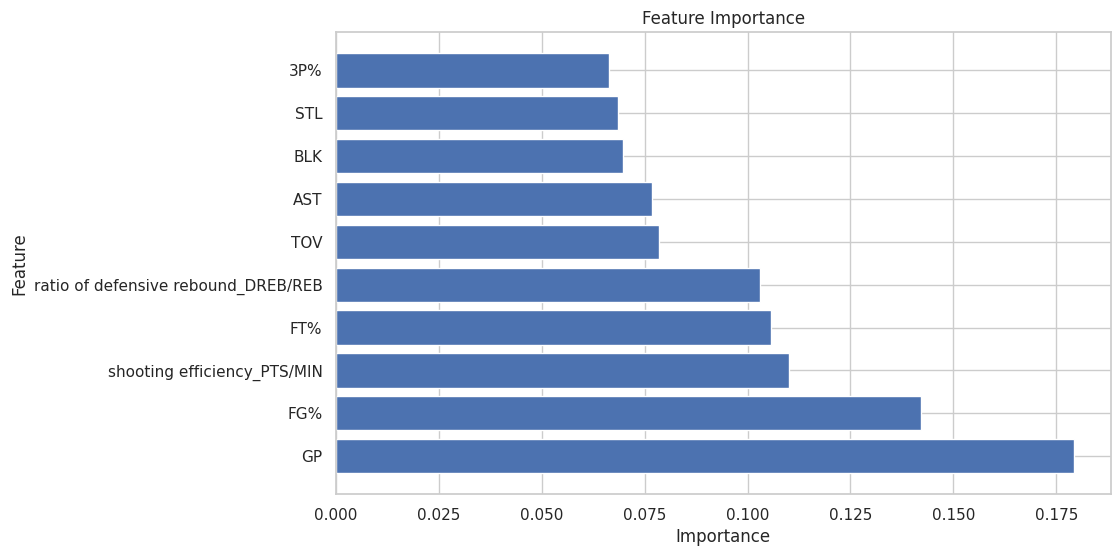

In [153]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
feature_importances = rf_classifier.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

## test de classification final

In [154]:
X_train

GP  FG%  3P%  FT%  AST  STL  BLK  TOV  shooting efficiency_PTS/MIN  \
0   0.15 0.00 0.32 0.82 0.12 0.19 0.09 0.12                         0.18   
1   0.75 0.50 0.37 0.42 0.27 0.58 0.18 0.50                         0.55   
2   0.45 0.42 0.00 0.05 0.07 0.13 0.45 0.15                         0.18   
3   0.87 0.82 0.00 0.30 0.10 0.26 1.00 0.35                         0.32   
4   0.99 0.43 0.38 0.52 0.80 0.32 0.09 0.38                         0.28   
..   ...  ...  ...  ...  ...  ...  ...  ...                          ...   
900 0.15 0.39 0.00 0.41 0.00 0.13 0.09 0.15                         0.20   
901 0.58 0.66 0.17 0.43 0.29 0.26 0.27 0.42                         0.53   
902 0.86 0.33 1.00 0.35 0.15 0.19 0.91 0.42                         0.36   
903 0.17 0.01 0.32 0.33 0.22 0.39 0.09 0.23                         0.13   
904 0.85 0.73 0.00 0.32 0.12 0.26 0.73 0.23                         0.27   

     ratio of defensive rebound_DREB/REB  
0                                   1.00  
1                                   0.34  
2                                   0.36  
3                                   0.42  
4                                   0.70  
..                                   ...  
900                                 0.47  
901                                 0.47  
902                                 0.49  
903                                 0.59  
904                                 0.36  

[905 rows x 10 columns]

In [155]:
X_final = pd.concat([X_train, X_test],ignore_index=True)
Y_final = pd.concat([y_train, y_test],ignore_index=True)

In [156]:
X_final

GP  FG%  3P%  FT%  AST  STL  BLK  TOV  shooting efficiency_PTS/MIN  \
0    0.15 0.00 0.32 0.82 0.12 0.19 0.09 0.12                         0.18   
1    0.75 0.50 0.37 0.42 0.27 0.58 0.18 0.50                         0.55   
2    0.45 0.42 0.00 0.05 0.07 0.13 0.45 0.15                         0.18   
3    0.87 0.82 0.00 0.30 0.10 0.26 1.00 0.35                         0.32   
4    0.99 0.43 0.38 0.52 0.80 0.32 0.09 0.38                         0.28   
...   ...  ...  ...  ...  ...  ...  ...  ...                          ...   
1289 0.99 0.56 0.13 0.65 0.24 0.26 0.55 0.54                         0.51   
1290 0.38 0.39 0.00 0.36 0.07 0.13 0.36 0.15                         0.41   
1291 0.69 0.42 0.32 0.71 0.17 0.13 0.09 0.23                         0.46   
1292 0.94 0.38 0.45 0.47 0.37 0.45 0.27 0.42                         0.31   
1293 0.96 0.13 0.26 0.71 0.17 0.32 0.27 0.23                         0.15   

      ratio of defensive rebound_DREB/REB  
0                                    1.00  
1                                    0.34  
2                                    0.36  
3                                    0.42  
4                                    0.70  
...                                   ...  
1289                                 0.47  
1290                                 0.50  
1291                                 0.62  
1292                                 0.36  
1293                                 0.66  

[1294 rows x 10 columns]

In [157]:
Y_final

0      0.00
1      1.00
2      0.00
3      0.00
4      1.00
       ... 
1289   1.00
1290   0.00
1291   1.00
1292   1.00
1293   1.00
Name: TARGET_5Yrs, Length: 1294, dtype: float64

En comparant la logique et les résultats des modèles des deux perspectives, on a opté pour la sélection et création de nouvelles variables représentatives. Ce choix est justifié aussi par les meilleurs résultats obtenus suite à   l'entrainement des trois modèles et leur évaluation en utilisant la fonction  "custom score".

In [159]:

labels = Y_final.values # labels


df_vals = X_final.values
#MODEL=SVC()
#MODEL=RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])
MODEL= LogisticRegression()
#MODEL=RandomForestClassifier(max_depth=50, random_state=0)
def score_classifier(dataset,classifier,labels):

    """
    performs 3 random trainings/tests to build a confusion matrix and prints results with precision and recall scores
    :param dataset: the dataset to work on
    :param classifier: the classifier to use
    :param labels: the labels used for training and validation
    :return:
    """

    kf = KFold(n_splits=3,random_state=50,shuffle=True)
    confusion_mat = np.zeros((2,2))
    recall = 0
    f1=0
    for training_ids,test_ids in kf.split(dataset):
        training_set = dataset[training_ids]
        training_labels = labels[training_ids]
        test_set = dataset[test_ids]
        test_labels = labels[test_ids]
        print(type(test_set))
        classifier.fit(training_set,training_labels)
        predicted_labels = classifier.predict(test_set)
        confusion_mat+=confusion_matrix(test_labels,predicted_labels)
        recall += recall_score(test_labels, predicted_labels)
        f1 += f1_score(test_labels, predicted_labels)
    recall/=3
    f1/=3
    print("F1 score",f1)
    print(confusion_mat)
    print("recall(sensitivity) score",recall)
score_classifier(df_vals,MODEL,labels)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
F1 score 0.7867234726339078
[[250. 237.]
 [130. 677.]]
recall(sensitivity) score 0.8402313387035538


Interprétation:
une amélioration est constaté au niveau de valeur des deux métriques F1 score et sensibilité(recall) avant et après nettoyage et traitement des données pour les trois modèles.

Le modèle Logistic régression nous a donné les meilleurs résultats:

Avant:Recall 0.83, F1 score 0.782

Après: Recall 0.846, F1 score 0.786

 Il  est à son tour utilisé comme un modèle entrainé pour l'intégration.


### Enregistrement model

In [161]:
joblib.dump(MODEL,'trained_model.pkl')


['trained_model.pkl']

In [163]:
joblib.dump(scaler_final, 'scaler_model.pkl')

['scaler_model.pkl']